## CLT and Confidence Intervals

In [8]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [25]:
data = pd.read_csv("BlackFriday.csv")
#data taken from https://www.kaggle.com/llopesolivei/blackfriday

In [26]:
dataall.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
data.shape

(537577, 12)

#### Why shape requires no paranthesis while head() requires ?

A Class can contain variables as well as methods/functions.

In case of shape, it is provided as an attribute/variable since this information is essential to any dataframe manipulation thus it is precomputed and available as an attribute.

head() is a method/functionality and not a attribute.

#### A Class has-
1. Variables / Data members / Attributes 
2. Methods or functions

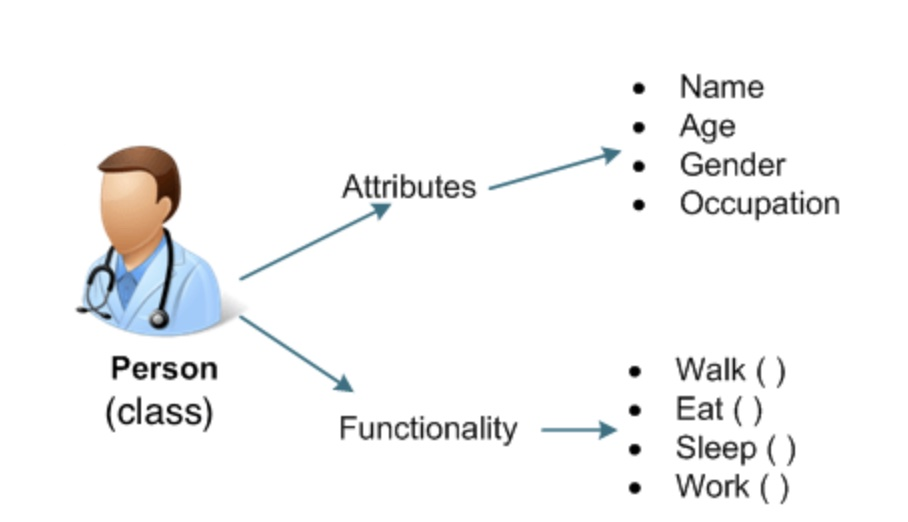

In [79]:
df_sum = data.describe()
df_sum

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [144]:
pop_mean = df_sum.loc['mean','Purchase']
print(pop_mean)

pop_var = df_sum.loc['std','Purchase']
pop_var

9333.859852635065


4981.022132656483

In [27]:
#Take purchase data and pick a random sample from it to find the mean
purchasedata = data['Purchase']

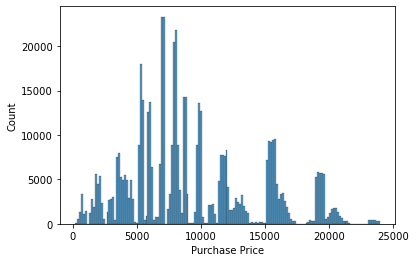

In [28]:
plot1 = sns.histplot(data = purchasedata)
plot1.set_xlabel('Purchase Price')
plt.show()

In [29]:
print(type(purchasedata))
purchase_list = purchasedata.tolist()

<class 'pandas.core.series.Series'>


In [30]:
mean_pdata = sum(purchase_list)/len(purchase_list)
mean_pdata

9333.859852635065

In [32]:
# Taking samples of 5,50,100,500 from a population of appx. 5 Lakh records.

n1 = 5
n2 = 50
n3 = 100
n4 = 500
avg1 = []
avg2 = []
avg3 = []
avg4 = []
for i in range(100000):
    randsample1 = random.sample(purchase_list,n1)
    randsample2 = random.sample(purchase_list,n2)
    randsample3 = random.sample(purchase_list,n3)
    randsample4 = random.sample(purchase_list,n4)
    avg1.append(sum(randsample1)/len(randsample1)) # 1 Lakh averages of 5 sample set
    avg2.append(sum(randsample2)/len(randsample2))
    avg3.append(sum(randsample3)/len(randsample3))
    avg4.append(sum(randsample4)/len(randsample4))
dataavg = pd.DataFrame({'avg1' : avg1,'avg2' : avg2,'avg3' : avg3 ,'avg4' : avg4  })

In [33]:
dataavg  # so we get 1 lakh averages sample set repeated 1 lakh times

,avg1,avg2,avg3,avg4
0,9587.2,9964.06,7924.42,9083.106
1,6698.8,9002.24,8737.26,9200.216
2,8231.6,9288.56,9474.74,9782.556
3,9236.8,8839.14,8809.39,9681.256
4,13914.8,8806.74,9817.42,9140.562
...,...,...,...,...
99995,8270.4,9416.76,8683.84,9280.164
99996,6895.6,9159.84,10289.49,9357.980
99997,10555.2,9015.10,9094.19,9357.674
99998,8737.8,8075.62,8903.44,9351.180


In [55]:
dataavg.describe()

,avg1,avg2,avg3,avg4
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,9336.068566,9333.531473,9331.249690,9333.831102
std,2227.334630,704.011203,497.949282,223.173685
min,1961.800000,6583.180000,7309.840000,8427.466000
25%,7749.400000,8851.855000,8992.210000,9181.695000
50%,9223.000000,9324.700000,9326.470000,9332.843000
75%,10799.600000,9803.900000,9664.432500,9484.564500
max,19494.000000,12236.360000,11460.260000,10277.474000


In [65]:
type(dataavg.describe())
df = dataavg.describe()

avg3_s_mean = df.iloc[1,2]
print(avg3_s_mean)

std_s = df.iloc[2,2]
std_s   # should be sigma/rootn as in proof below

9331.249690199986


497.9492819970172

### Only for CLT

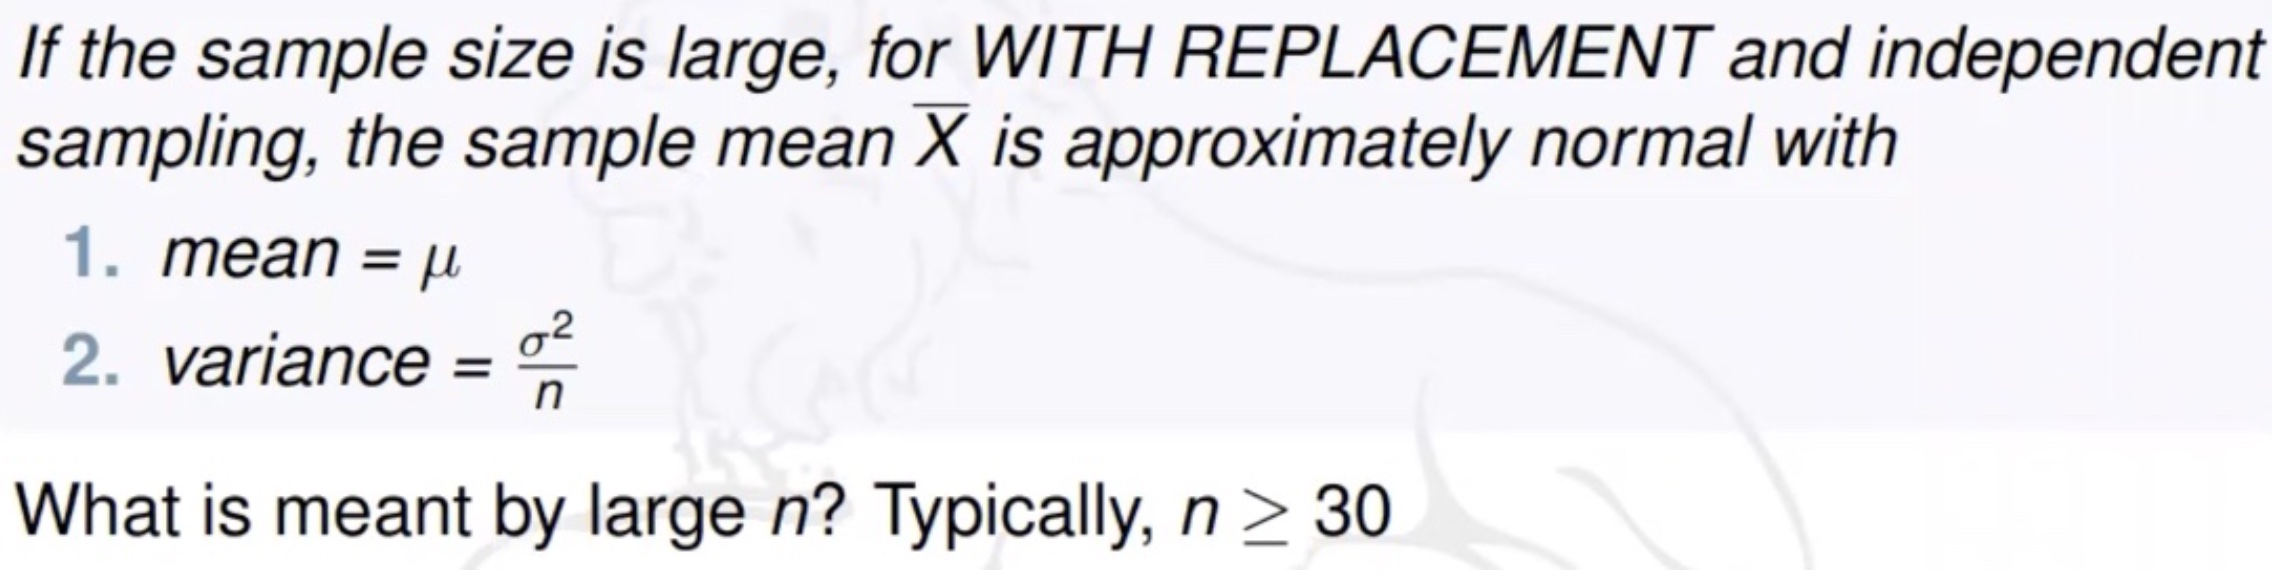

### Proof

- We can verify that sample std dev. will be sigma/rootn when actual population std dev is sigma.

- e.g. As above for avg3 for (n=100), the standard deviation is 497.949.

- Population std dev for purchase data is 4981.022 (as per results from data.describe())
- So 4981.022/root100 is appx 498.10

- Hence proved!

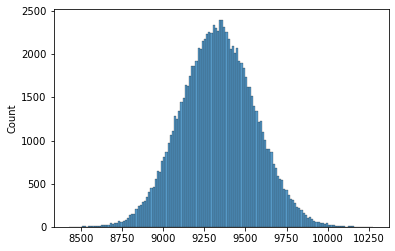

In [34]:
sns.histplot(avg4)
plt.show()

### Plotting averages of different samples in 4 histograms - Normal Distrubution per CLT

### Observations from plots-
1. As per CLT irrespective of original distribution of data, averages will approach to be normal distribution as n > 30.
2. n=5 not symmetric, rest all seems to be symmetric.
3. As the sample size is increased, the variance in Xbar is reducing. In sample of 500, variance is lesser. The variance is sigma^2/n.
4. The variance in random variable is also equivalent to standard error in estimation of mean of population, so more accurate estimate if variance is less.
5. In n=500 variance is lesser compared to n=50.




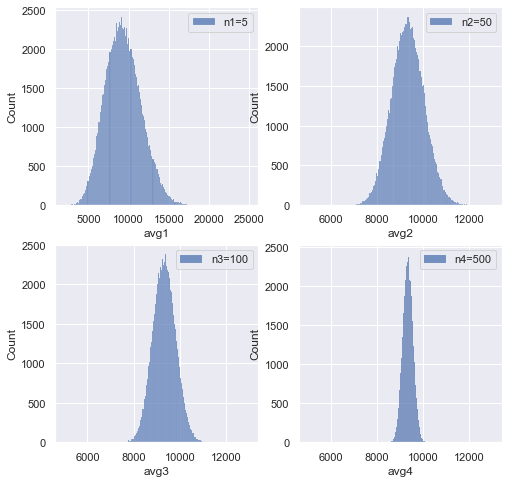

In [54]:
sns.set(style = "darkgrid")


fig, axes = plt.subplots(2,2, figsize = (8,8))
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]


sns.histplot(data= dataavg, x = 'avg1',  binrange = [2000,25000], label="n1=5", ax = ax1)
#sns.histplot(data= dataavg, x = 'avg1',  binrange = [5000,13000], ax = axs[0,0])
ax1.legend()

sns.histplot(data= dataavg,x = 'avg2', binrange = [5000,13000], label="n2=50", ax = ax2)
ax2.legend()

sns.histplot(data= dataavg,x = 'avg3', binrange = [5000,13000], label="n3=100", ax = ax3)
ax3.legend()

sns.histplot(data= dataavg,x = 'avg4',binrange = [5000,13000], label="n4=500", ax = ax4)
ax4.legend()

plt.show()

## Building the Confidence Interval

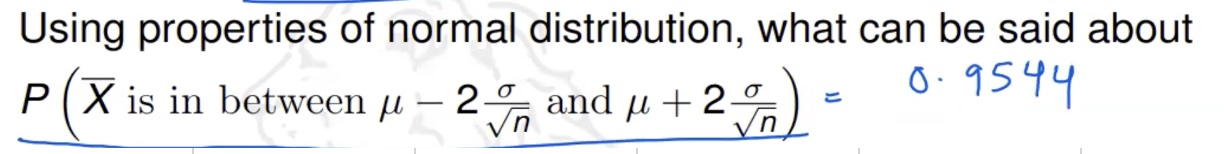

- After rearrangement of terms-
- Xbar is a random variable and refers to sample mean


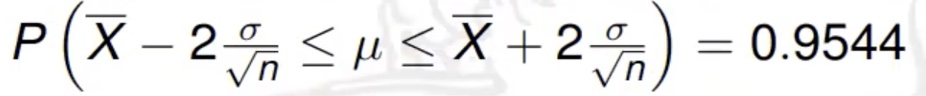

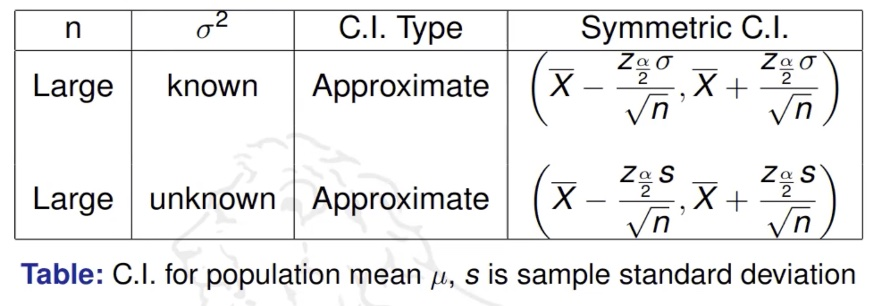

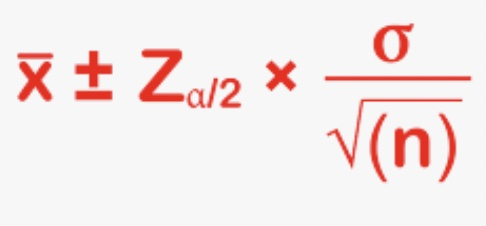

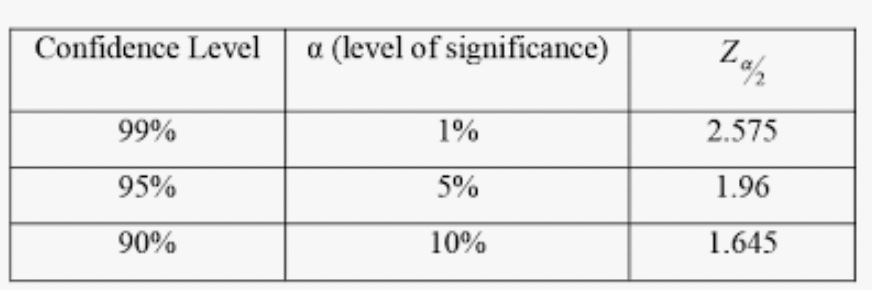

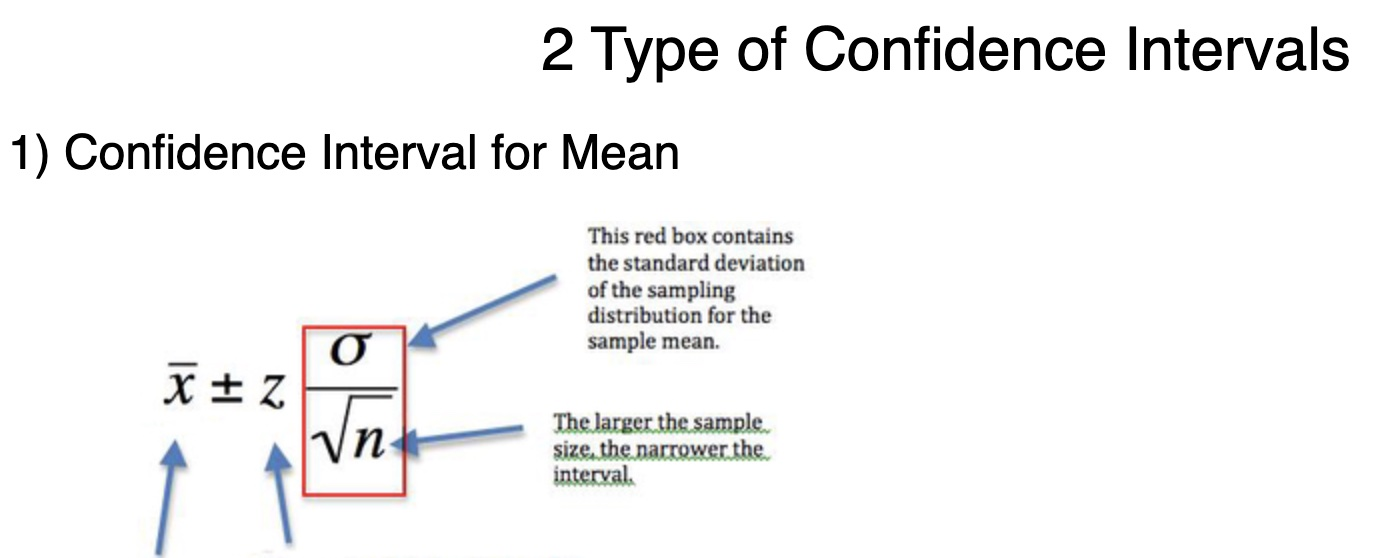

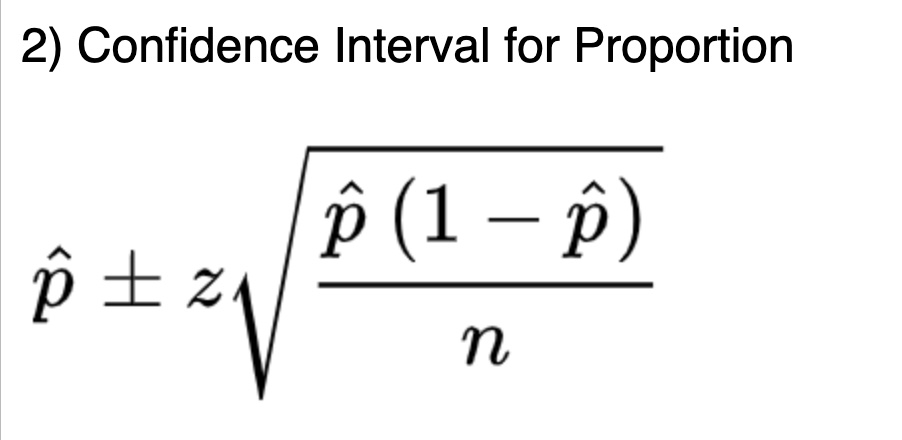

## Case 1 Using CI formula for sigma is known



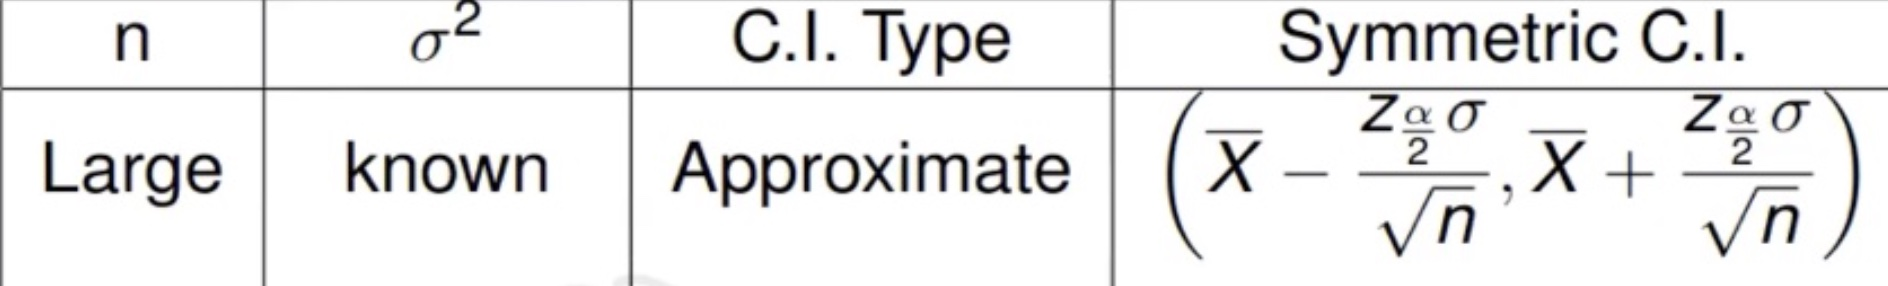

In [86]:
from math import sqrt

n=100 
count = 0      # z(alpha/2) at 95% CI is 1.96 


for i in dataavg['avg3']:
    if (i >= avg3_s_mean-1.96*pop_var/sqrt(n)) and (i <= avg3_s_mean+1.96*pop_var/sqrt(n)):
        count=count+1

print('count of data within 2 std dev',count)
print('% of data within 2 std',(count/100000)*100 )

count of data within 2 std dev 94971
% of data within 2 std 94.971


In [90]:
# Underroot calculation 
n=100
n**0.5

10.0

## Case 2 Using CI formula for sigma is unknown - usually this will be case


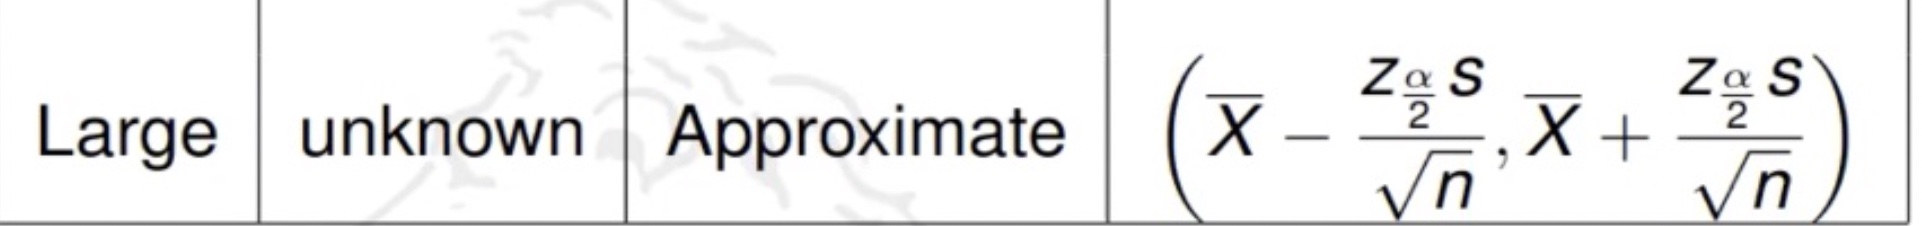

Zalpha/2 at 95% Confidence Level is 1.96.

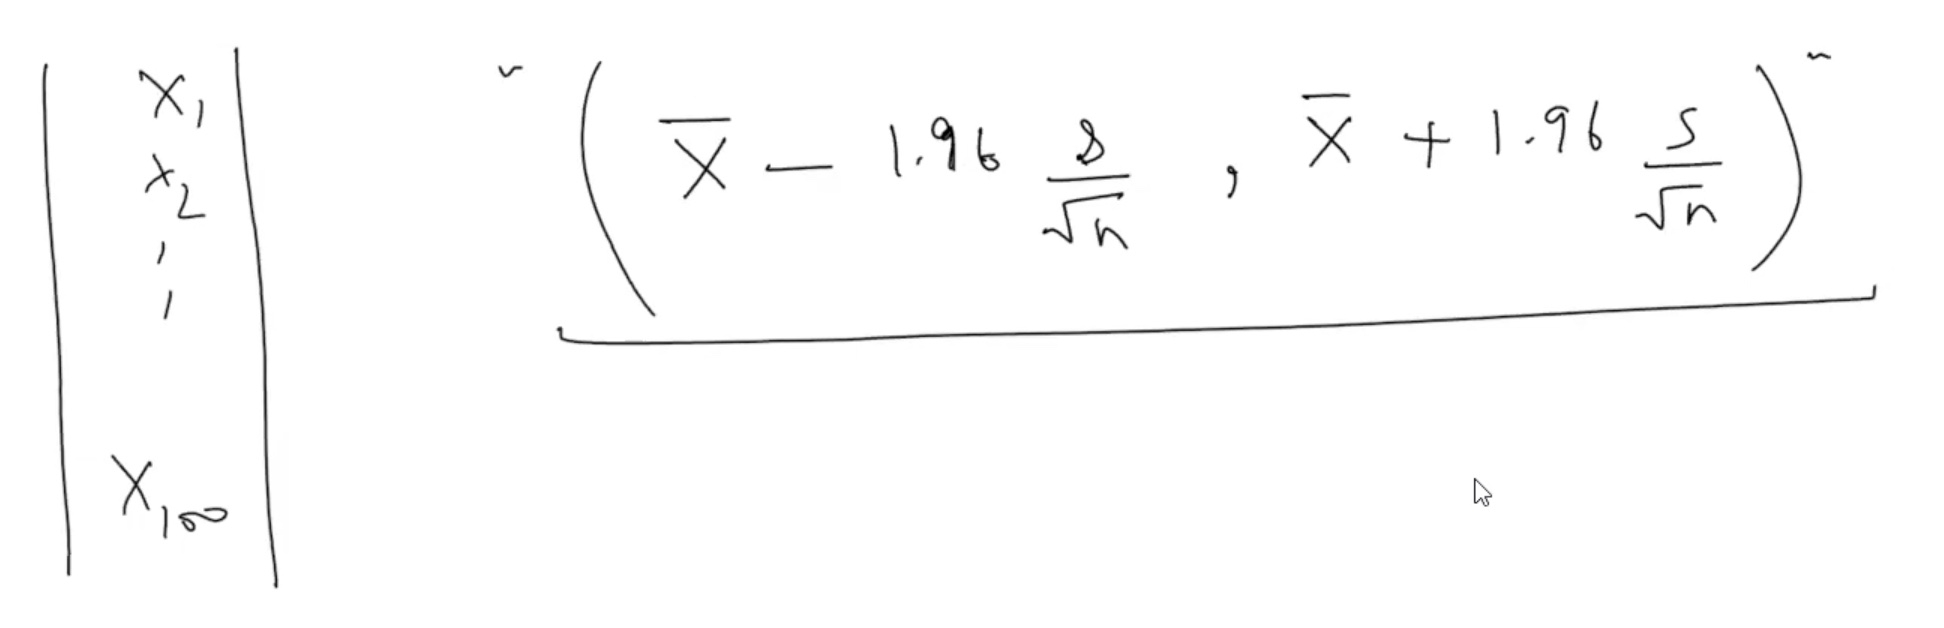

### Significance of cilower and cihigher Confidence Intervals
- We are able to say that we are 95% sure that the true value of the population mean is b/w cilower and cihigher
- Also this is better way to communicate - as instead of saying this is my sample mean which should be appx. of population mean u say that i am 95% sure that true mean (of population) will lie b/w ci lower value to ci upper value.

In [91]:
len(purchase_list) # from which u take 100 samples every time

537577

#### Steps -

1. You select 100 random samples from purchase_list which is total population 5 lakh.
2. Then calculate avg of those 100 samples as xbarci.
3. Initialize variance = 0
4. var = var + (randsampleci[i]-xbarci)**2 -> calculation of numerator of below formula
5. var = var/(n1-1)  -> numerator calculated above / n-1 (here,n=n1) which is denominator.
6. Then std = square/under root of variance ->  stdev = var**0.5
7. By formula of Confidence interval, lower limit = cilower1 = xbarci - 1.96*stdev/(n1**0.5)
8. By formula of Confidence interval, upper limit= cihigher1 = xbarci +1.96*stdev/(n1**0.5)
9. Repeat this process 1 lakh times with everytime picking a different random sample of 100 out of total population-purchase_list.<br>
randsampleci = random.sample(purchase_list,n1)




#### Sample variance formula as below ( for calculation of s in the formula for Confidence Interval)

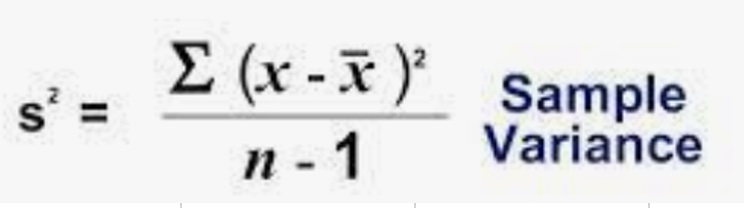


In [137]:
n1 = 100   # sample size
cilower = []
cihigher = []
for j in range(1000000): # Repeat exp 1 million times
    randsampleci = random.sample(purchase_list,n1)
    xbarci = sum(randsampleci)/len(randsampleci)
    var = 0
    
    for i in range(n1):  # for every number in 100 samples u need to calculate (x-xbar)& add
        var = var + (randsampleci[i]-xbarci)**2
    var = var/(n1-1)
    stdev = var**0.5
    cilower1 = xbarci - 1.96*stdev/(n1**0.5)
    cihigher1 = xbarci + 1.96*stdev/(n1**0.5)
    cilower.append(cilower1)
    cihigher.append(cihigher1)


In [138]:
print(len(cilower))
cilower

1000000


[8193.14977063686,
 8910.881036529712,
 8236.89287300089,
 8046.671765416571,
 9186.250691615853,
 8742.667712929071,
 8143.485110386666,
 8423.80713738203,
 8828.184753124899,
 7973.903877750573,
 7946.881866964325,
 8274.372874766903,
 8220.119003124506,
 10107.450634578538,
 8721.000796448177,
 7992.222772692007,
 8363.594477060353,
 8169.622784496016,
 8406.212676893758,
 8946.56787907017,
 8689.072726420845,
 8563.84905870897,
 7908.08871651412,
 8778.340803576593,
 8055.05634113961,
 7689.35774641108,
 8967.451250442973,
 8451.745297212194,
 7431.952873896538,
 8050.871767381286,
 7117.082679416058,
 8301.722133355419,
 8198.697541556048,
 8384.847957385662,
 7758.4764763672165,
 8039.488451689194,
 7651.442024081053,
 8812.157048903506,
 8306.216585619874,
 8424.837734939678,
 8357.559931461858,
 8665.223726406173,
 8400.46381140375,
 8910.285107870053,
 7937.153512614325,
 8688.740010547812,
 8362.541788671886,
 8608.313544681132,
 8288.602056813766,
 8975.122665770168,
 7787.2

In [139]:
print(len(cihigher))
cihigher

1000000


[10237.27022936314,
 10664.278963470288,
 10399.507126999111,
 9996.148234583428,
 11294.649308384149,
 10655.172287070929,
 9885.234889613335,
 10481.31286261797,
 10827.875246875103,
 10010.876122249425,
 9869.178133035677,
 10271.387125233096,
 10272.260996875495,
 12322.149365421461,
 10809.139203551822,
 9779.177227307995,
 10308.785522939648,
 10033.257215503985,
 10573.447323106242,
 10931.532120929829,
 10817.787273579155,
 10319.670941291031,
 9820.551283485878,
 10813.079196423405,
 10102.943658860391,
 9479.32225358892,
 11149.948749557028,
 10252.114702787807,
 9362.127126103464,
 10121.308232618714,
 9219.357320583942,
 10117.677866644583,
 10143.92245844395,
 10340.312042614338,
 9704.94352363278,
 9965.791548310805,
 9441.737975918948,
 10715.402951096496,
 10081.983414380127,
 10405.282265060321,
 10509.680068538144,
 10564.556273593826,
 10220.316188596249,
 10823.434892129948,
 9929.186487385676,
 10692.65998945219,
 10337.158211328115,
 10518.466455318867,
 10399.377

In [146]:
count = 0
for i in range(1000000):
    if cilower[i] <= pop_mean and cihigher[i] >= pop_mean: # if both condition happen at same 
        count = count +1                                   # time then true value contained.
count

946229

- Hence we are able to say that we are 95% sure / i.e. 95% of times that the true value of the population mean is b/w cilower and cihigher.
- Experiment is repeated 10,00,000 times & out of which appx. 95% of time 9,46,231 times population mean actually lies b/w cilower and cihigher.

### Confidence Interval simulation for estimation of parameter PROPORTION of population 

https://www.youtube.com/watch?v=bGALoCckICI